<a href="https://colab.research.google.com/github/vbkulsh117/TestRepo/blob/master/ME565_Class_Example_Pybamm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3 - Basic plotting

In [Tutorial 2](./Tutorial%202%20-%20Compare%20models.ipynb), we made use of PyBaMM's automatic plotting function when comparing models. This gave a good quick overview of many of the key variables in the model. However, by passing in just a few arguments it is easy to plot any of the many other variables that may be of interest to you. We start by building and solving a model as before:

In [ ]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import matplotlib.pyplot as plt

parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.search("Current")
parameter_values["Current function [A]"] = 5

model_dfn = pybamm.lithium_ion.DFN()
sim_dfn = pybamm.Simulation(model_dfn, parameter_values=parameter_values)
sim_dfn.solve([0, 3700])

Current function [A]	5.0
Negative current collector conductivity [S.m-1]	58411000.0
Negative current collector density [kg.m-3]	8960.0
Negative current collector specific heat capacity [J.kg-1.K-1]	385.0
Negative current collector thermal conductivity [W.m-1.K-1]	401.0
Negative current collector thickness [m]	1.2e-05
Negative electrode exchange-current density [A.m-2]	<function graphite_LGM50_electrolyte_exchange_current_density_Chen2020 at 0x7fbebae1e700>
Positive current collector conductivity [S.m-1]	36914000.0
Positive current collector density [kg.m-3]	2700.0
Positive current collector specific heat capacity [J.kg-1.K-1]	897.0
Positive current collector thermal conductivity [W.m-1.K-1]	237.0
Positive current collector thickness [m]	1.6e-05
Positive electrode exchange-current density [A.m-2]	<function nmc_LGM50_electrolyte_exchange_current_density_Chen2020 at 0x7fbebae1e820>
SEI reaction exchange current density [A.m-2]	1.5e-07
Typical current [A]	5.0


We now want to plot a selection of the model variables. To see a full list of the available variables just type:

In [ ]:
model_dfn.variable_names()

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]',
 'x_p',
 'x_p [m]',
 'r_n',
 'r_n [m]',
 'r_p',
 'r_p [m]',
 'Current density variable',
 'Total current density',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Throughput capacity [A.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change',
 'X-averaged negative electrode porosity change',
 'Separator porosity change',
 'X-averaged separator porosity change',
 'Positive electrode porosity change',
 'X-averaged positive electrode porosity change',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variabl

There are a _lot_ of variables. You can also search the list of variables for a particular string (e.g. "electrolyte")

In [ ]:
model_dfn.variables.search("electrolyte")

Electrolyte concentration
Electrolyte concentration [Molar]
Electrolyte concentration [mol.m-3]
Electrolyte concentration concatenation
Electrolyte convection flux
Electrolyte current density
Electrolyte current density [A.m-2]
Electrolyte diffusion flux
Electrolyte flux
Electrolyte flux [mol.m-2.s-1]
Electrolyte migration flux
Electrolyte potential
Electrolyte potential [V]
Electrolyte transport efficiency
Gradient of electrolyte potential
Gradient of negative electrolyte potential
Gradient of positive electrolyte potential
Gradient of separator electrolyte potential
Loss of lithium inventory, including electrolyte [%]
Negative electrolyte concentration
Negative electrolyte concentration [Molar]
Negative electrolyte concentration [mol.m-3]
Negative electrolyte potential
Negative electrolyte potential [V]
Negative electrolyte transport efficiency
Positive electrolyte concentration
Positive electrolyte concentration [Molar]
Positive electrolyte concentration [mol.m-3]
Positive electroly

We have tried to make variables names fairly self explanatory. However, there are two variables for most quantities. This is because PyBaMM utilises both dimensionless and dimensional variables for these quantities. As a rule, the dimensionless variables have no units in their name and the dimensional variables have units in their name. If in doubt, we recommend using the dimensional variable with units.

As a first example, we choose to plot the terminal voltage. We add this to a list and then pass this list to the `plot` method of our simulation:

In [ ]:
output_variables = ["Terminal voltage [V]"]
sim_dfn.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.450397628192, step=35.55450397628192), …

Alternatively, we may be interested in plotting both the electrolyte concentration and the terminal voltage. In which case, we would do:

In [ ]:
experiment = pybamm.Experiment(
    [
        ("Discharge at 2C for 1 hours or until 2.8 V",
        "Rest for 0.5 hour",
        "Charge at 5 A until 4.1 V",
        "Hold at 4.1 V until 250 mA",
        "Rest for 0.5 hour")
    ]
    * 2,
)

model = pybamm.lithium_ion.DFN()
sim_dfn = pybamm.Simulation(model,parameter_values=parameter_values, experiment=experiment, solver=pybamm.CasadiSolver())
sim_dfn.solve()
#sim_dfn.plot()

output_variables = ['Negative electrode potential [V]',"Electrolyte concentration [mol.m-3]",'Positive electrode potential [V]','Exchange current density [A.m-2]','Negative particle concentration', "Electrolyte potential [V]",'Positive particle concentration',"Terminal voltage [V]"]
sim_dfn.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=6.150444060068563, step=0.06150444060068563)…

You can also plot multiple variables on the same plot by nesting lists

In [ ]:
sim_dfn.plot([["Electrode current density", "Electrolyte current density"], "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=6.150444060068563, step=0.06150444060068563)…

In [ ]:
sim_dfn.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=5.062932533703162, step=0.050629325337031614…

For plotting the voltage components you can use the `plot_votage_components` function

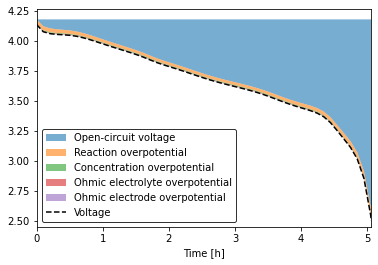

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Time [h]'>)

In [ ]:
pybamm.plot_voltage_components(sim_dfn.solution)

And with a few modifications (by creating subplots and by providing the axes on which the voltage components have to be plotted), it can also be used to compare the voltage components of different simulations

Current function [A]	5.0
Negative current collector conductivity [S.m-1]	58411000.0
Negative current collector density [kg.m-3]	8960.0
Negative current collector specific heat capacity [J.kg-1.K-1]	385.0
Negative current collector thermal conductivity [W.m-1.K-1]	401.0
Negative current collector thickness [m]	1.2e-05
Negative electrode exchange-current density [A.m-2]	<function graphite_LGM50_electrolyte_exchange_current_density_Chen2020 at 0x7fbebae1e700>
Positive current collector conductivity [S.m-1]	36914000.0
Positive current collector density [kg.m-3]	2700.0
Positive current collector specific heat capacity [J.kg-1.K-1]	897.0
Positive current collector thermal conductivity [W.m-1.K-1]	237.0
Positive current collector thickness [m]	1.6e-05
Positive electrode exchange-current density [A.m-2]	<function nmc_LGM50_electrolyte_exchange_current_density_Chen2020 at 0x7fbebae1e820>
SEI reaction exchange current density [A.m-2]	1.5e-07
Typical current [A]	5.0


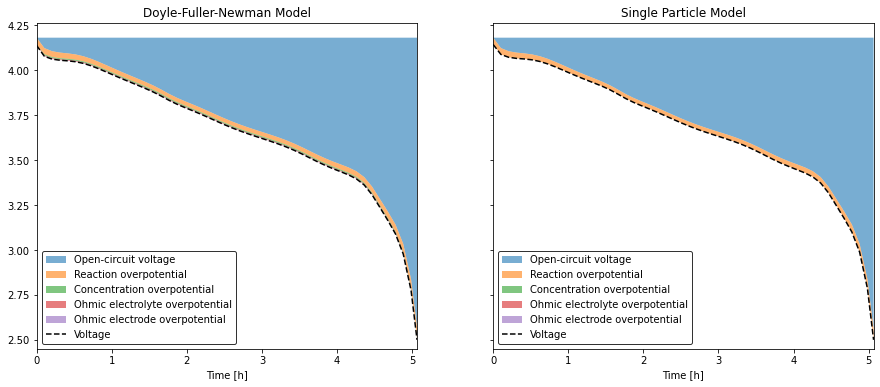

In [ ]:
# simulating and solving Single Particle Model

parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.search("Current")
parameter_values["Current function [A]"] = 1

model_dfn = pybamm.lithium_ion.DFN()
sim_dfn = pybamm.Simulation(model_dfn, parameter_values=parameter_values)
sim_dfn.solve([0, 37000])

model_spm = pybamm.lithium_ion.SPM()
sim_spm = pybamm.Simulation(model_spm, parameter_values=parameter_values)
sim_spm.solve([0, 37000])

# comparing voltage components for Doyle-Fuller-Newman model and Single Particle Model
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

pybamm.plot_voltage_components(sim_dfn.solution, ax=axes.flat[0])
pybamm.plot_voltage_components(sim_spm.solution, ax=axes.flat[1])

axes.flat[0].set_title("Doyle-Fuller-Newman Model")
axes.flat[1].set_title("Single Particle Model")

plt.show()

In this tutorial we have seen how to use the plotting functionality in PyBaMM.

In [Tutorial 4](./Tutorial%204%20-%20Setting%20parameter%20values.ipynb) we show how to change parameter values.

## References

The relevant papers for this notebook are:

In [ ]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, and S. Jon Chapman. An asymptotic derivation of a single particle model with electrolyte. Journal of The Electrochemical Society, 166(15):A3693–A3706, 2019. doi:10.1149/